<a href="https://colab.research.google.com/github/MikhailKuklin/time-series-analysis-forecasting/blob/main/ts_anaylsis_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# libraries

import numpy as np
import pandas as pd
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
%matplotlib inline

In [3]:
# download data and parse date to datetime

df = pd.read_csv('espoo_2020_2022.csv',
                 parse_dates= {"date" : ["Year","m","d","Time"]},
                keep_date_col=True)

In [4]:
# rename column

df['Temperature (C)'] = df['Air temperature (degC)']
df.drop(['Air temperature (degC)'],axis=1, inplace=True)

In [5]:
# drop duplicated and nas

df=df.drop_duplicates()

df.dropna(axis=0,inplace=True)

df.shape

(17566, 7)

In [21]:
# make date to be index

df = df.set_index('date')

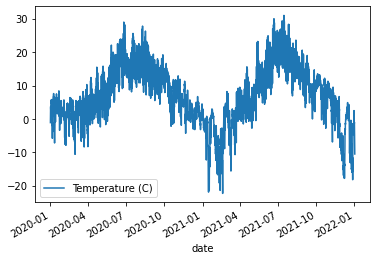

In [27]:
# check temperatures to get the impression of a trend
# trend (upward, stationary, downward, seasonal) and cyclical compoonent (no trend)

df.plot.line(y='Temperature (C)')

In [23]:
# use the Hodrick-Prescott filter to separate into a trend and cyclical component

temp_cycle, temp_trend = hpfilter(df['Temperature (C)'],lamb=1600)

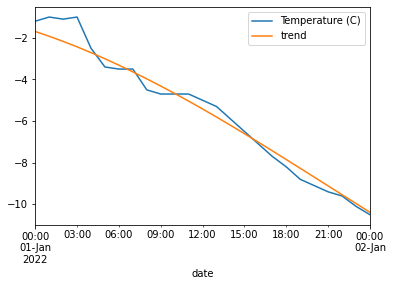

In [25]:
# visualize trend

df['trend'] = temp_trend
df[['Temperature (C)','trend']]['2022-01-01':].plot();

Time series decomposition with ETS

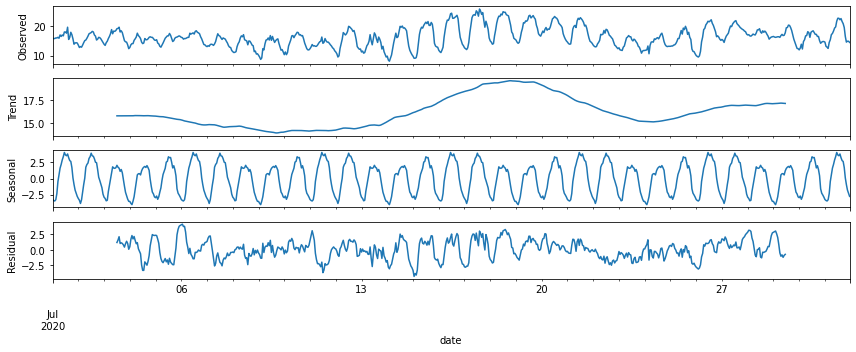

In [77]:
# ETR models (Error-Trend-Seasonality) => to separate the different components
# make the model for July 2020 using additive model

df2 = df['2020-07-01':'2020-07-31']

result = seasonal_decompose(x=df2['Temperature (C)'], model='additive', freq=120)

rcParams['figure.figsize'] = 12,5
result.plot();

Exponentially Weighed Moving Average (EWMA)